### 一.简介
支持向量机(svm)的想法与前面介绍的感知机模型类似，找一个超平面将正负样本分开，但svm的想法要更深入了一步，它要求正负样本中离超平面最近的点的距离要尽可能的大，所以svm模型建模可以分为两个子问题：  

（1）分的对：怎么能让超平面将正负样本分的开；  
（2）分的好：怎么能让距离超平面最近的点的距离尽可能的大。  

**对于第一个子问题**：将样本分开，与感知机模型一样，我们也可以定义模型目标函数为：  

$$
f(x)=sign(w^Tx+b)
$$  
所以对每对样本$(x,y)$，只要满足$y\cdot (w^Tx+b)>0$，即表示模型将样本正确分开了  

**对于第二个子问题**：怎么能让离超平面最近的点的距离尽可能的大，对于这个问题，又可以拆解为两个小问题：  

（1）怎么度量距离？
（2）距离超平面最近的点如何定义？

距离的度量很简单，可以使用高中时代就知道的点到面的距离公式：  
$$
d=\frac{|w^Tx+b|}{||w||}
$$  

距离超平面最近的点，我们可以强制定义它为满足$|w^Tx+b|=1$的点（注意，正负样本都要满足），为什么可以这样定义呢？我们可以反过来看，一个训练好的模型可以满足：（1）要使得正负样本距离超平面最近的点的距离都尽可能大，那么这个距离必然要相等，（2）参数$w,b$可以等比例的变化，而不会影响到模型自身，所以$|w^Tx+b|=1$自然也可以满足，所以这时最近的点的距离可以表示为：

$$
d^*=\frac{1}{||w||}
$$

同时第一个子问题的条件要调整为$y\cdot(w^Tx+b)\geq1$，而$\max d^*$可以等价的表示为$\min \frac{1}{2}w^Tw$，所以svm模型的求解可以表述为如下优化问题：  

$$
\min_{w,b} \frac{1}{2}w^Tw \\
s.t.y_i(w^Tx_i+b)\geq 1,i=1,2,...,N
$$

### 二.原优化问题的对偶问题
对于上面优化问题的求解往往转化为对其对偶问题的求解，首先，构造其拉格朗日函数：  

$$
L(w,b,\alpha)=\frac{1}{2}w^Tw+\sum_{i=1}^N \alpha_i(1-y_i(w^Tx_i+b)),\alpha=[\alpha_1,\alpha_2,...,\alpha_N]
$$  

这时，原优化问题（设为$P$）就等价于：  

$$
\min_{w,b}\max_{\alpha}L(w,b,\alpha)\\
s.t.\alpha_i\geq 0,i=1,2,...,N
$$  

这里简单说明一下为什么等价，首先看里面$\max$那一层
$$\max_{\alpha}L(w,b,\alpha)\\
s.t.\alpha_i\geq 0,i=1,2,...,N$$  

对每个样本都有约束条件$1-y_i(w^Tx_i+b)$，如果满足约束，即$\leq 0$，必有$\alpha_i(1-y_i(w^Tx_i+b))=0$，如果不满足，必有$\alpha_i(1-y_i(w^Tx_i+b))\rightarrow 正无穷$，所以，（1）如果所有样本均满足约束条件(即$w,b$在可行域内时)，原问题与上面的$\min\max$问题等价，（2）如果有任意一个样本不满足约束，这时上面$\max$问题的函数取值为正无穷，外层再对其求$\min$会约束其只能在可行域内求最小值，所以两问题是等价的，简单手绘演示一下（两个问题的最优解都是红点标记）：  
![avatar](./source/06_原问题与其min-max问题.png) 

假设对于问题$P$我们求得了最优解$w^*,b^*,\alpha^*$，则必有$L(w^*,b^*,\alpha^*)=L(w^*,b^*,0)$，所以有：  

$$
\sum_{i=1}^N\alpha_i^*(1-y_i({w^*}^Tx_i+b^*))=0(条件1)
$$  

而最优解自然也满足原始的约束条件，即：  

$$
1-y_i({w^*}^Tx_i+b)\leq0,i=1,2,...,N(条件2)\\
\alpha_i^*\geq0,i=1,2,...,N(条件3)\\
$$  

由条件1，2，3，我们可以得出更强地约束条件：  

$$
\alpha_i^*(1-y_i({w^*}^Tx_i+b^*))=0,i=1,2,...,N(条件4)
$$  

证明也很简单，由条件2,3可以知道，$\forall i,\alpha_i^*(1-y_i({w^*}^Tx_i+b^*))\leq0$都成立，要使条件1成立，则只能$\alpha_i^*(1-y_i({w^*}^Tx_i+b^*))=0,i=1,2,...,N$。


进一步的，可以推导出这样的关系：  

$$
\forall \alpha_i^*>0\Rightarrow 1-y_i({w^*}^Tx_i+b^*)=0(关系1)\\
\forall 1-y_i({w^*}^Tx_i+b^*)<0\Rightarrow \alpha_i^*=0(关系2)
$$  

所以条件4有个很形象的称呼：**互补松弛条件**，而对于满足关系1的样本，也有个称呼，叫**支持向量**   

好的，我们继续看svm的对偶问题（设为$Q$）的定义：  
$$
\max_{\alpha}\min_{w,b}L(w,b,\alpha)\\
s.t.\alpha_i\geq 0,i=1,2,...,N
$$  

很幸运，svm的对偶问题$\max\min$与原问题$\min\max$等价（等价是指两个问题的最优值、最优解$w,b,\alpha$均相等，**具体证明需要用到原问题为凸以及slater条件，可以参看《凸优化》**），先看里层的$\min_{w,b} L(w,b,\alpha)，$由于$L(w,b,\alpha)$是关于$w,b$的凸函数，所以对偶问题的最优解必然满足：$L(w,b,\alpha)$关于$w,b$的偏导为0，即：  

$$
w=\sum_{i=1}^N\alpha_iy_ix_i(条件5)\\
0=\sum_{i=1}^N\alpha_iy_i(条件6)
$$

消去$w,b$，可得对偶问题关于$\alpha$的表达式：  

$$
\max_{\alpha} \sum_{i=1}^N\alpha_i-\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_jx_i^Tx_j\\
s.t.\sum_{i=1}^N\alpha_iy_i=0,\\
\alpha_i\geq0,i=1,2,...,N
$$  

显然，等价于如下优化问题（设为$Q^*$）：  

$$
\min_{\alpha} \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_jx_i^Tx_j-\sum_{i=1}^N\alpha_i\\
s.t.\sum_{i=1}^N\alpha_iy_i=0,\\
\alpha_i\geq0,i=1,2,...,N
$$


该问题是关于$\alpha$的凸二次规划(QP)问题，可以通过一些优化计算包(比如cvxopt)直接求解最优的$\alpha^*$，再由条件5，可知：

$$
w^*=\sum_{i=1}^N\alpha_i^*y_ix_i
$$


而关于$b^*$，我们可以巧妙求解：找一个样本点$(x_i,y_i)$，它满足对应的$\alpha_i^*>0$（即支持向量），利用关系1，可知$1-y_i({w^*}^Tx_i+b^*)=0$，所以：$b^*=y_i-{w^*}^Tx_i$   

这里，条件2,3,4,5,6即是**KKT条件**，而且对于该优化问题，**KKT条件**还是最优解的充分条件（**证明部分...可以参考《凸优化》**），即满足KKT条件的解就是最优解。

### 三.SMO求解对偶问题最优解
关于对偶问题($Q^*$)可以使用软件包暴力求解，而且一定能得到最优解，但它的复杂度有点高：（1）变量数与样本数相同，每个变量$\alpha_i$对应样本$(x_i,y_i)$；（2）约束条件数也与样本数相同；而序列最小最优化化(sequential minimal optimization,SMO)算法是求解SVM对偶问题的一种启发式算法，它的思路是：**每次只选择一个变量优化，而固定住其他变量**，比如选择$\alpha_1$进行优化，而固定住$\alpha_i,i=2,3,...,N$，但由于我们的问题中有一个约束：$\sum_i^N\alpha_iy_i=0$，需要另外选择一个$\alpha_2$来配合$\alpha_1$做改变，当两者中任何一个变量确定后，另外一个也就随之确定了，比如确定$\alpha_2$后：  

$$
\alpha_1=-y_i\sum_{i=2}^N\alpha_iy_i(关系3)
$$  

**选择两个变量后，如果优化？**  
我们在选择好两个变量后，如何进行优化呢？比如选择的$\alpha_1,\alpha_2$，由于剩余的$\alpha_3,\alpha_4,...,\alpha_N$都视作常量，在$Q^*$中可以忽略，重新整理一下此时的$Q^*$：  

$$
\min_{\alpha_1,\alpha_2}\frac{1}{2}\alpha_1^2 x_1^Tx_1+\frac{1}{2}\alpha_2^2x_2^Tx_2+\alpha_1\alpha_2y_1y_2x_1^Tx_2+\frac{1}{2}\alpha_1y_1x_1^T\sum_{i=3}^N\alpha_iy_ix_i+\frac{1}{2}\alpha_2y_2x_2^T\sum_{i=3}^N\alpha_iy_ix_i-\alpha_1-\alpha_2\\
s.t.\alpha_1y_1+\alpha_2y_2=-\sum_{i=3}^N\alpha_iy_i=\eta\\
\alpha_1\geq0,\alpha_2\geq0
$$  

这里求解其实就很简单了，将关系3带入，消掉$\alpha_1$后可以发现，优化的目标函数其实是关于$\alpha_2$的二次函数（且开口朝上）：  

$$
\min_{\alpha_2}\frac{1}{2}(x_1-x_2)^T(x_1-x_2)\alpha_2^2+(-y_2\eta x_1^Tx_1+y_1\eta x_1^Tx_2+\frac{1}{2}y_2x_2^T\gamma-\frac{1}{2}y_2x_1^T\gamma-1+y_1y_2)\alpha_2\\
s.t.\alpha_2\geq0,y_1(\eta-\alpha_2y_2)\geq0
$$  

这里，$\eta=-\sum_{i=3}^N\alpha_iy_i,\gamma=\sum_{i=3}^N\alpha_iy_ix_i$  

所以该问题无约束的最优解为：  

$$
\alpha_2^{unc}=-\frac{-y_2\eta x_1^Tx_1+y_1\eta x_1^Tx_2+\frac{1}{2}y_2x_2^T\gamma-\frac{1}{2}y_2x_1^T\gamma-1+y_1y_2}{(x_1-x_2)^T(x_1-x_2)}(公式1)
$$



接下来，我们对上面的表达式做一些优化，大家注意每次迭代时，$\gamma,\eta$都有大量的重复计算（每次仅修改了$\alpha$的两个变量，剩余部分其实无需重复计算），而且对于$\alpha_1,\alpha_2$的更新也没有有效利用它上一阶段的取值（记作$\alpha_1^{old},\alpha_2^{old}$）：  

我们记：  
$$
g(x)=\sum_{i=1}^N\alpha_iy_ix_i^Tx+b
$$  
记：  
$$
E_i=g(x_i)-y_i
$$  
这里$g(x)$表示模型对$x$的预测值，$E_i$表示预测值与真实值之差，于是我们有：  

$$
x_1^T\gamma=g(x_1)-\alpha_1^{old}y_1x_1^Tx_1-\alpha_2^{old}y_2x_2^Tx_1-b^{old}\\
x_2^T\gamma=g(x_2)-\alpha_1^{old}y_1x_1^Tx_2-\alpha_2^{old}y_2x_2^Tx_2-b^{old}
$$

另外：  

$$
\eta=\alpha_1^{old}y_1+\alpha_2^{old}y_2
$$
带入公式1，可得：  

$$
\alpha_2^{unc}=\alpha_2^{old}+\frac{y_2(E_1^{old}-E_2^{old})}{\beta}
$$  

这里$\beta=(x_1-x_2)^T(x_1-x_2)$，到这一步，可以发现计算量大大降低，因为$E_1^{old},E_2^{old}$可先缓存到内存中，但别忘了$\alpha_2$还有约束条件$\alpha_2\geq0,y_1(\eta-\alpha_2y_2)\geq0$，所以需要进一步对它的最优解分情况讨论：  

当$y_1y_2=1$时，
$$
\alpha_2^{new}=\left\{\begin{matrix}
0 & \alpha_2^{unc}<0\\ 
\alpha_2^{unc} & 0\leq\alpha_2^{unc}\leq \alpha_1^{old}+\alpha_2^{old}\\ 
\alpha_1^{old}+\alpha_2^{old} & \alpha_2^{unc}>\alpha_1^{old}+\alpha_2^{old}
\end{matrix}\right.
$$  

当$y_1y_2=-1$时，  

$$
\alpha_2^{new}=\left\{\begin{matrix}
\alpha_2^{unc} & \alpha_2^{unc}\geq max\{0,\alpha_2^{old}-\alpha_1^{old}\}\\ 
max\{0,\alpha_2^{old}-\alpha_1^{old}\} & \alpha_2^{unc}< max\{0, \alpha_2^{old}-\alpha_1^{old}\}
\end{matrix}\right.
$$  

到这儿，我们可以发现，SMO算法可以极大的方便$Q^*$的求解，而且是以解析解方式，得到$\alpha_2^{new}$后，由于$\alpha_1^{new}y_1+\alpha_2^{new}y_2=\alpha_1^{old}y_1+\alpha_2^{old}y_2$，可得到$\alpha_1^{new}$的更新公式：  
$$
\alpha_1^{new}=\alpha_1^{old}+y_1y_2(\alpha_2^{old}-\alpha_2^{new})
$$

最后，得到$w$的更新公式：  

$$
w^{new}=w^{old}+(\alpha_1^{new}-\alpha_1^{old})y_1x_1+(\alpha_2^{new}-\alpha_2^{old})y_2x_2
$$


**对$b$和$E$的更新**

而对于$b$的更新同样借助于$\alpha_1,\alpha_2$更新，在更新后，倾向于$\alpha_1^{new}>0,\alpha_2^{new}>0$，还记得前面的互补松弛条件吧（条件4），即对于$\alpha_i>0$的情况，必然要有$1-y_i(w^Tx_i+b)=0$成立，即$w^Tx_i+b=y_i$，所以对$(x_1,y_1),(x_2,y_2)$有如下关系：  

$$
{w^{new}}^Tx_1+b=y_1(关系4)\\
{w^{new}}^Tx_2+b=y_2(关系5)\\
$$  
对关系4和关系5可以分别计算出$b_1^{new}=y_1-{w^{new}}^Tx_1,b_2^{new}=y_2-{w^{new}}^Tx_2$，对$b$的更新，可以取两者的均值：  

$$
b^{new}=\frac{b_1^{new}+b_2^{new}}{2}
$$  

接下来，对于$E_1,E_2$的更新就很自然了：  

$$
E_1^{new}={w^{new}}^Tx_1+b^{new}-y_1\\
E_2^{new}={w^{new}}^Tx_2+b^{new}-y_2
$$
那接下来还有一个问题，那就是$\alpha_1,\alpha_2$如何选择的问题  

**如何选择两个优化变量？**  

这可以启发式选择，分为两步：第一步是如何选择$\alpha_1$，第二步是在选定$\alpha_1$时，如何选择一个不错的$\alpha_2$：  

**$\alpha_1$的选择**   

选择$\alpha_1$同感知机模型类似，选择一个不满足KKT条件的点$(x_i,y_i)$，即不满足如下两种情况之一的点：  

$$
\left\{\begin{matrix}
\alpha_i=0\Leftrightarrow  y_i(w^Tx_i+b)\geq1\\ 
\alpha_i>0\Leftrightarrow  y_i(w^Tx_i+b)=1
\end{matrix}\right.
$$

**$\alpha_2$的选择**  

对$\alpha_2$的选择倾向于选择使其变化尽可能大的点，由前面的更新公式可知是使$\mid E_1^{old}-E_2^{old}\mid$最大的点，所以选择的两个点$(x_1,y_1)$和$(x_2,y_2)$会更倾向于选择异类的点

### 四.代码实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import random
import os
os.chdir('../')
from ml_models import utils
%matplotlib inline

In [2]:
#定义一个绘制决策边界以及支持向量的函数（并放到utils中）
def plot_decision_function(X, y, clf, support_vectors=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')
    # 绘制支持向量
    if support_vectors is not None:
        plt.scatter(X[support_vectors, 0], X[support_vectors, 1], s=80, c='none', alpha=0.7, edgecolor='red')

In [3]:
"""
硬间隔支持向量机的smo实现,放到ml_models.svm模块
"""
class HardMarginSVM(object):
    def __init__(self, epochs=100):
        self.w = None
        self.b = None
        self.alpha = None
        self.E = None
        self.epochs = epochs
        # 记录支持向量
        self.support_vectors = None

    def init_params(self, X, y):
        """
        :param X: (n_samples,n_features)
        :param y: (n_samples,) y_i\in\{0,1\}
        :return:
        """
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = .0
        self.alpha = np.zeros(n_samples)
        self.E = np.zeros(n_samples)
        # 初始化E
        for i in range(0, n_samples):
            self.E[i] = np.dot(self.w, X[i, :]) + self.b - y[i]

    def _select_j(self, best_i):
        """
        选择j
        :param best_i:
        :return:
        """
        valid_j_list = [i for i in range(0, len(self.alpha)) if self.alpha[i] > 0 and i != best_i]
        best_j = -1
        # 优先选择使得|E_i-E_j|最大的j
        if len(valid_j_list) > 0:
            max_e = 0
            for j in valid_j_list:
                current_e = np.abs(self.E[best_i] - self.E[j])
                if current_e > max_e:
                    best_j = j
                    max_e = current_e
        else:
            # 随机选择
            l = list(range(len(self.alpha)))
            seq = l[: best_i] + l[best_i + 1:]
            best_j = random.choice(seq)
        return best_j

    def _meet_kkt(self, w, b, x_i, y_i, alpha_i):
        """
        判断是否满足KKT条件

        :param w:
        :param b:
        :param x_i:
        :param y_i:
        :return:
        """
        if alpha_i < 1e-7:
            return y_i * (np.dot(w, x_i) + b) >= 1
        else:
            return abs(y_i * (np.dot(w, x_i) + b) - 1) < 1e-7

    def fit(self, X, y2, show_train_process=False):
        """

        :param X:
        :param y2:
        :param show_train_process: 显示训练过程
        :return:
        """
        y = copy.deepcopy(y2)
        y[y == 0] = -1
        # 初始化参数
        self.init_params(X, y)
        for _ in range(0, self.epochs):
            if_all_match_kkt = True
            for i in range(0, len(self.alpha)):
                x_i = X[i, :]
                y_i = y[i]
                alpha_i_old = self.alpha[i]
                E_i_old = self.E[i]
                # 外层循环：选择违反KKT条件的点i
                if not self._meet_kkt(self.w, self.b, x_i, y_i, alpha_i_old):
                    if_all_match_kkt = False
                    # 内层循环，选择使|Ei-Ej|最大的点j
                    best_j = self._select_j(i)

                    alpha_j_old = self.alpha[best_j]
                    x_j = X[best_j, :]
                    y_j = y[best_j]
                    E_j_old = self.E[best_j]

                    # 进行更新
                    # 1.首先获取无裁剪的最优alpha_2
                    eta = np.dot(x_i - x_j, x_i - x_j)
                    # 如果x_i和x_j很接近，则跳过
                    if eta < 1e-3:
                        continue
                    alpha_j_unc = alpha_j_old + y_j * (E_i_old - E_j_old) / eta
                    # 2.裁剪并得到new alpha_2
                    if y_i == y_j:
                        if alpha_j_unc < 0:
                            alpha_j_new = 0
                        elif 0 <= alpha_j_unc <= alpha_i_old + alpha_j_old:
                            alpha_j_new = alpha_j_unc
                        else:
                            alpha_j_new = alpha_i_old + alpha_j_old
                    else:
                        if alpha_j_unc < max(0, alpha_j_old - alpha_i_old):
                            alpha_j_new = max(0, alpha_j_old - alpha_i_old)
                        else:
                            alpha_j_new = alpha_j_unc

                    # 如果变化不够大则跳过
                    if np.abs(alpha_j_new - alpha_j_old) < 1e-5:
                        continue
                    # 3.得到alpha_1_new
                    alpha_i_new = alpha_i_old + y_i * y_j * (alpha_j_old - alpha_j_new)
                    # 4.更新w
                    self.w = self.w + (alpha_i_new - alpha_i_old) * y_i * x_i + (alpha_j_new - alpha_j_old) * y_j * x_j
                    # 5.更新alpha_1,alpha_2
                    self.alpha[i] = alpha_i_new
                    self.alpha[best_j] = alpha_j_new
                    # 6.更新b
                    b_i_new = y_i - np.dot(self.w, x_i)
                    b_j_new = y_j - np.dot(self.w, x_j)
                    if alpha_i_new > 0:
                        self.b = b_i_new
                    elif alpha_j_new > 0:
                        self.b = b_j_new
                    else:
                        self.b = (b_i_new + b_j_new) / 2.0
                    # 7.更新E
                    for k in range(0, len(self.E)):
                        self.E[k] = np.dot(self.w, X[k, :]) + self.b - y[k]
                    # 显示训练过程
                    if show_train_process is True:
                        utils.plot_decision_function(X, y2, self, [i, best_j])
                        utils.plt.pause(0.1)
                        utils.plt.clf()

            # 如果所有的点都满足KKT条件，则中止
            if if_all_match_kkt is True:
                break
        # 计算支持向量
        self.support_vectors = np.where(self.alpha > 1e-3)[0]
        # 利用所有的支持向量，更新b
        self.b = np.mean([y[s] - np.dot(self.w, X[s, :]) for s in self.support_vectors.tolist()])
        # 显示最终结果
        if show_train_process is True:
            utils.plot_decision_function(X, y2, self, self.support_vectors)
            utils.plt.show()

    def get_params(self):
        """
        输出原始的系数
        :return: w
        """

        return self.w, self.b

    def predict_proba(self, x):
        """
        :param x:ndarray格式数据: m x n
        :return: m x 1
        """
        return utils.sigmoid(x.dot(self.w) + self.b)

    def predict(self, x):
        """
        :param x:ndarray格式数据: m x n
        :return: m x 1
        """
        proba = self.predict_proba(x)
        return (proba >= 0.5).astype(int)

### 五.效果检验

In [9]:
from sklearn.datasets import make_classification
# 生成分类数据
data, target = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=1, n_redundant=0,
                                   n_repeated=0, n_clusters_per_class=1, class_sep=2.0)

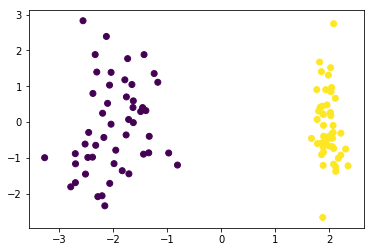

In [10]:
plt.scatter(data[:,0],data[:,1],c=target)

In [11]:
#训练
svm = HardMarginSVM()
svm.fit(data, target)

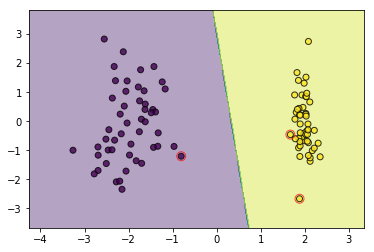

In [12]:
plot_decision_function(data, target, svm, svm.support_vectors)

In [8]:
#可视化训练过程,建议在pycharm中运行，notebook会生成很多张图片
# svm = HardMarginSVM()
# svm.fit(data, target,show_train_process=True)

### 六.问题讨论

#### 1.非线可分的情况如何处理？
大家可以将上面的代码多运行几次，可以发现如果有异常点等情况出现时（即线性不可分时），模型训练的结果会很难看，后面小节将会对这种情况做处理，教模型如何去“容忍”这些不好看的点，或者巧妙地通过坐标映射的方式将低维数据映射到高维空间进而可以线性可分  
#### 2.原问题本就是凸优化问题，为何还要转对偶问题求解？
个人觉得更多是为了引入核技巧，因为对偶问题进行计算时，有关于两个点内积的计算：$x_i^Tx_j$，这可以方便的用核函数替代$\kappa(x_i,x_j)$，便于处理非线性可分的情况